In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker




In [88]:
df = pd.read_csv('/Users/anastassiatroitskaia/Desktop/BrainStation/combined_dataset - combined_dataset.csv')

In [89]:
df.head()

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome,Unnamed: 12
0,1,Ragdolls,US,USD,Film & Video,Webseries,2013-04-25 0:00:00,2013-05-25 0:00:00,15000,20.000,3.000,failed,NaN
1,2,One To Ten,GB,GBP,Film & Video,Shorts,2015-11-16 0:00:00,2015-12-16 0:00:00,223.68,413.810,23.000,successful,NaN
2,3,Future Gun - A short film about kids and advan...,US,USD,Film & Video,Animation,2013-08-28 0:00:00,2013-09-27 0:00:00,5000,1497.000,28.000,failed,NaN
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,US,USD,Fashion,Apparel,2014-07-22 0:00:00,2014-08-21 0:00:00,6000,8795.000,218.000,successful,NaN
4,5,The Rich Lifestyle,US,USD,Film & Video,Documentary,2016-08-24 0:00:00,2016-09-28 0:00:00,2000000,2.000,2.000,failed,NaN


In [90]:
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

In [91]:
df.head()

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome
0,1,Ragdolls,US,USD,Film & Video,Webseries,2013-04-25 0:00:00,2013-05-25 0:00:00,15000,20.000,3.000,failed
1,2,One To Ten,GB,GBP,Film & Video,Shorts,2015-11-16 0:00:00,2015-12-16 0:00:00,223.68,413.810,23.000,successful
2,3,Future Gun - A short film about kids and advan...,US,USD,Film & Video,Animation,2013-08-28 0:00:00,2013-09-27 0:00:00,5000,1497.000,28.000,failed
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,US,USD,Fashion,Apparel,2014-07-22 0:00:00,2014-08-21 0:00:00,6000,8795.000,218.000,successful
4,5,The Rich Lifestyle,US,USD,Film & Video,Documentary,2016-08-24 0:00:00,2016-09-28 0:00:00,2000000,2.000,2.000,failed


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_ID    14999 non-null  int64  
 1   Campaign_Name  14999 non-null  object 
 2   Country        14999 non-null  object 
 3   Currency       14999 non-null  object 
 4   Category       14999 non-null  object 
 5   Sub_Category   14999 non-null  object 
 6   launched       14999 non-null  object 
 7   deadline       14999 non-null  object 
 8   goal           14999 non-null  object 
 9   pledged        14999 non-null  float64
 10  backers        14999 non-null  float64
 11  outcome        14999 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [93]:
df.isnull().sum()

Campaign_ID      0
Campaign_Name    0
Country          0
Currency         0
Category         0
Sub_Category     0
launched         0
deadline         0
goal             0
pledged          0
backers          0
outcome          0
dtype: int64

In [94]:
# checking for duplicate values in the data 
duplicates = df.duplicated()

In [95]:
print(df[duplicates])

Empty DataFrame
Columns: [Campaign_ID, Campaign_Name, Country, Currency, Category, Sub_Category, launched, deadline, goal, pledged, backers, outcome]
Index: []


In [96]:
# jsut a sanity check
duplicates.sum()


0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_ID    14999 non-null  int64  
 1   Campaign_Name  14999 non-null  object 
 2   Country        14999 non-null  object 
 3   Currency       14999 non-null  object 
 4   Category       14999 non-null  object 
 5   Sub_Category   14999 non-null  object 
 6   launched       14999 non-null  object 
 7   deadline       14999 non-null  object 
 8   goal           14999 non-null  object 
 9   pledged        14999 non-null  float64
 10  backers        14999 non-null  float64
 11  outcome        14999 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [98]:
#Might revisit to convert date and time format

In [99]:
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')


In [100]:
# print("Unique values in 'launched' column:", df['launched'].unique())
# print("Unique values in 'deadline' column:", df['deadline'].unique())

In [101]:
df.head()

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome
0,1,Ragdolls,US,USD,Film & Video,Webseries,2013-04-25,2013-05-25,15000,20.000,3.000,failed
1,2,One To Ten,GB,GBP,Film & Video,Shorts,2015-11-16,2015-12-16,223.68,413.810,23.000,successful
2,3,Future Gun - A short film about kids and advan...,US,USD,Film & Video,Animation,2013-08-28,2013-09-27,5000,1497.000,28.000,failed
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,US,USD,Fashion,Apparel,2014-07-22,2014-08-21,6000,8795.000,218.000,successful
4,5,The Rich Lifestyle,US,USD,Film & Video,Documentary,2016-08-24,2016-09-28,2000000,2.000,2.000,failed


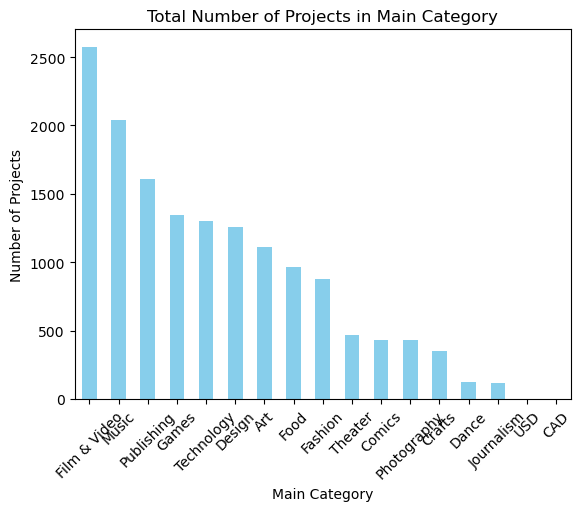

In [102]:
# Visualizations part
# We are creating chart to visualiza the total number of projects in the main category 

main_cat_counts = df['Category'].value_counts()

#Plotting counts

main_cat_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Projects in Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

In [103]:
categories = df['Category'].unique()

print("Unique categories in the 'Category' column:")
for category in categories:
    print(category)

Unique categories in the 'Category' column:
Film & Video
Fashion
Art
Theater
Crafts
Food
Technology
Publishing
Music
Design
Photography
Comics
Games
Journalism
Dance
USD
CAD


In [104]:
categories_to_check = ['USD', 'CAD']

# Filter the DataFrame to include only rows with the specified categories
filtered_df = df[df['Category'].isin(categories_to_check)]

# Display the filtered DataFrame
print(filtered_df)
filtered_df.head()

       Campaign_ID                       Campaign_Name  \
2799          2800     Mad About Trivia MOVIES Edition   
6231          6232  lifeleash Tourniquets. Easy to use   
13190        13192                              Rockz!   
14758        14760           frames4canvas - One piece   

                              Country Currency Category Sub_Category launched  \
2799                      Board Game"       US      USD        Games      NaT   
6231         built-in medical device"       US      USD   Technology      NaT   
13190            an Earbud Accessory"       US      USD       Design      NaT   
14758  slip-on frames for canvas art"       CA      CAD       Design      NaT   

        deadline                goal    pledged   backers outcome  
2799  2012-03-16  2012-04-15 0:00:00  25000.000 28083.000      20  
6231  2015-08-08  2015-09-07 0:00:00 100000.000   266.000       6  
13190 2015-05-28  2015-06-27 0:00:00   1000.000  2865.000     184  
14758 2016-04-06  2016-06-05 0:

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome
2799,2800,Mad About Trivia MOVIES Edition,"Board Game""",US,USD,Games,NaT,2012-03-16,2012-04-15 0:00:00,25000.000,28083.000,20
6231,6232,lifeleash Tourniquets. Easy to use,"built-in medical device""",US,USD,Technology,NaT,2015-08-08,2015-09-07 0:00:00,100000.000,266.000,6
13190,13192,Rockz!,"an Earbud Accessory""",US,USD,Design,NaT,2015-05-28,2015-06-27 0:00:00,1000.000,2865.000,184
14758,14760,frames4canvas - One piece,"slip-on frames for canvas art""",CA,CAD,Design,NaT,2016-04-06,2016-06-05 0:00:00,39221.840,977.410,10


In [201]:
# from above we can drop those entries since they are not needed for the further analyses 
# Define the set of categories that you want to keep
valid_categories = {'Film & Video', 'Music', 'Technology','Fashion',
'Art',
'Theater',
'Crafts',
'Food',
'Publishing',
'Design',
'Photography',
'Comics',
'Games',
'Journalism',
'Dance' }  # Add more categories as needed



In [202]:
# Filter the DataFrame to keep only rows with valid categories
df = df[df['Category'].isin(valid_categories)]

print(filtered_df)
filtered_df.head()

       Campaign_ID                       Campaign_Name  \
2799          2800     Mad About Trivia MOVIES Edition   
6231          6232  lifeleash Tourniquets. Easy to use   
13190        13192                              Rockz!   
14758        14760           frames4canvas - One piece   

                              Country Currency Category Sub_Category launched  \
2799                      Board Game"       US      USD        Games      NaT   
6231         built-in medical device"       US      USD   Technology      NaT   
13190            an Earbud Accessory"       US      USD       Design      NaT   
14758  slip-on frames for canvas art"       CA      CAD       Design      NaT   

        deadline                goal    pledged   backers outcome  
2799  2012-03-16  2012-04-15 0:00:00  25000.000 28083.000      20  
6231  2015-08-08  2015-09-07 0:00:00 100000.000   266.000       6  
13190 2015-05-28  2015-06-27 0:00:00   1000.000  2865.000     184  
14758 2016-04-06  2016-06-05 0:

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome
2799,2800,Mad About Trivia MOVIES Edition,"Board Game""",US,USD,Games,NaT,2012-03-16,2012-04-15 0:00:00,25000.000,28083.000,20
6231,6232,lifeleash Tourniquets. Easy to use,"built-in medical device""",US,USD,Technology,NaT,2015-08-08,2015-09-07 0:00:00,100000.000,266.000,6
13190,13192,Rockz!,"an Earbud Accessory""",US,USD,Design,NaT,2015-05-28,2015-06-27 0:00:00,1000.000,2865.000,184
14758,14760,frames4canvas - One piece,"slip-on frames for canvas art""",CA,CAD,Design,NaT,2016-04-06,2016-06-05 0:00:00,39221.840,977.410,10


In [205]:
# converting all the values in 'goal' and 'pledged' to float data type
df['goal'] = df['goal'].astype(float)
df['pledged'] = df['pledged'].astype(float)

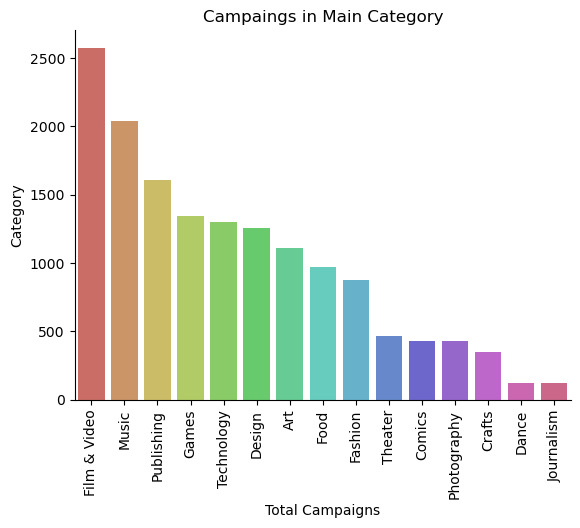

In [110]:
main_cat_counts = df['Category'].value_counts()
sns.barplot(x=main_cat_counts.index, y=main_cat_counts.values, data=df, palette="hls")
sns.despine()
#adding labels
plt.xlabel('Total Campaigns')
plt.ylabel('Category')
plt.title('Campaings in Main Category')

plt.xticks(rotation=90)
plt.show()

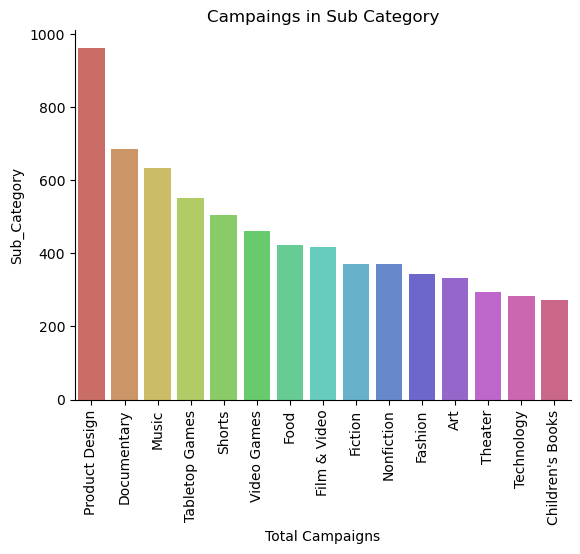

In [111]:
#Campaigns in sub category

sub_cat_counts = df['Sub_Category'].value_counts()
sub_cat_counts=sub_cat_counts.nlargest(15)
sns.barplot(x=sub_cat_counts.index, y=sub_cat_counts.values, data=df, palette="hls")
sns.despine()
#adding labels
plt.xlabel('Total Campaigns')
plt.ylabel('Sub_Category')
plt.title('Campaings in Sub Category')

plt.xticks(rotation=90)
plt.show()

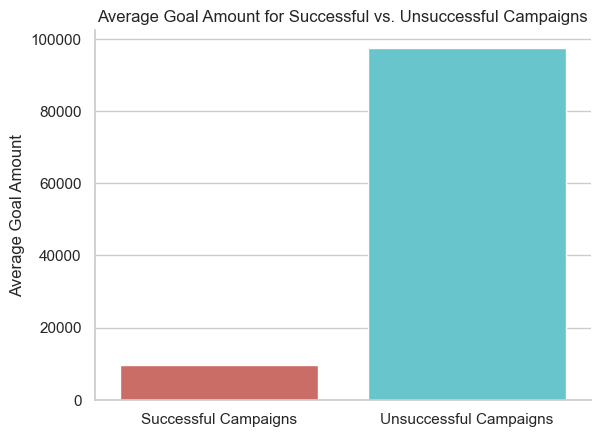

In [182]:
# Question 1 Visualization
# Are the goals for dollars raised significantly different between 
# successful and unsuccessful campaigns?

# Filter out succcessful and unsuccessful campaings
successful_campaigns = df[df['outcome'] == 'successful']
unsuccessful_campaigns = df[df['outcome'] == 'failed']

# Calculating average goal amount for successful and unsuccessful campaigns
avg_goal_successful = successful_campaigns['goal'].mean()
avg_goal_unsuccessful = unsuccessful_campaigns['goal'].mean()

#plt.figure(figsize=(8, 6))

sns.barplot(x=['Successful Campaigns', 'Unsuccessful Campaigns'], y=[avg_goal_successful, avg_goal_unsuccessful], palette=("hls"))
plt.title('Average Goal Amount for Successful vs. Unsuccessful Campaigns')
plt.ylabel('Average Goal Amount')
sns.despine()
plt.show()





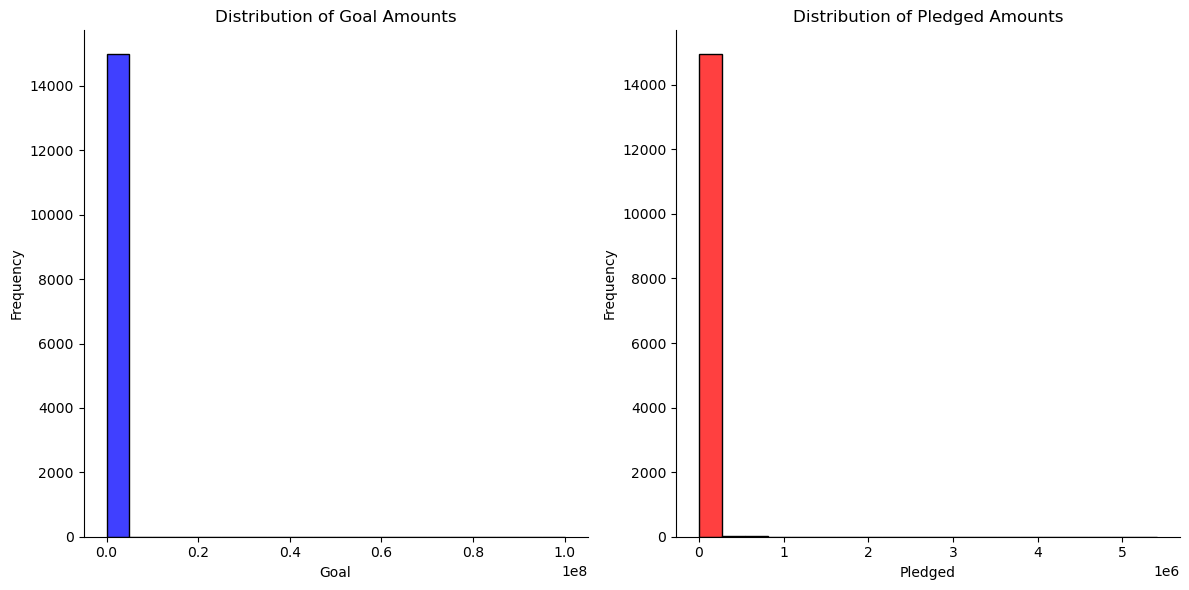

In [113]:
# Question 1 different visualization

# Convert values in 'goal' and 'pledged' columns to float
df['goal'] = df['goal'].astype(float)
df['pledged'] = df['pledged'].astype(float)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms using Seaborn
sns.histplot(df['goal'], bins=20, color='blue', ax=axes[0])
sns.histplot(df['pledged'], bins=20, color='red', ax=axes[1])

# Set titles and labels
axes[0].set_title('Distribution of Goal Amounts')
axes[0].set_xlabel('Goal')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Distribution of Pledged Amounts')
axes[1].set_xlabel('Pledged')
axes[1].set_ylabel('Frequency')
sns.despine()
plt.tight_layout()
plt.show()

In [114]:
#Question 2 
#What are the top/bottom 3 categories with the most backers? 
#What are the top/bottom 3 subcategories by backers?


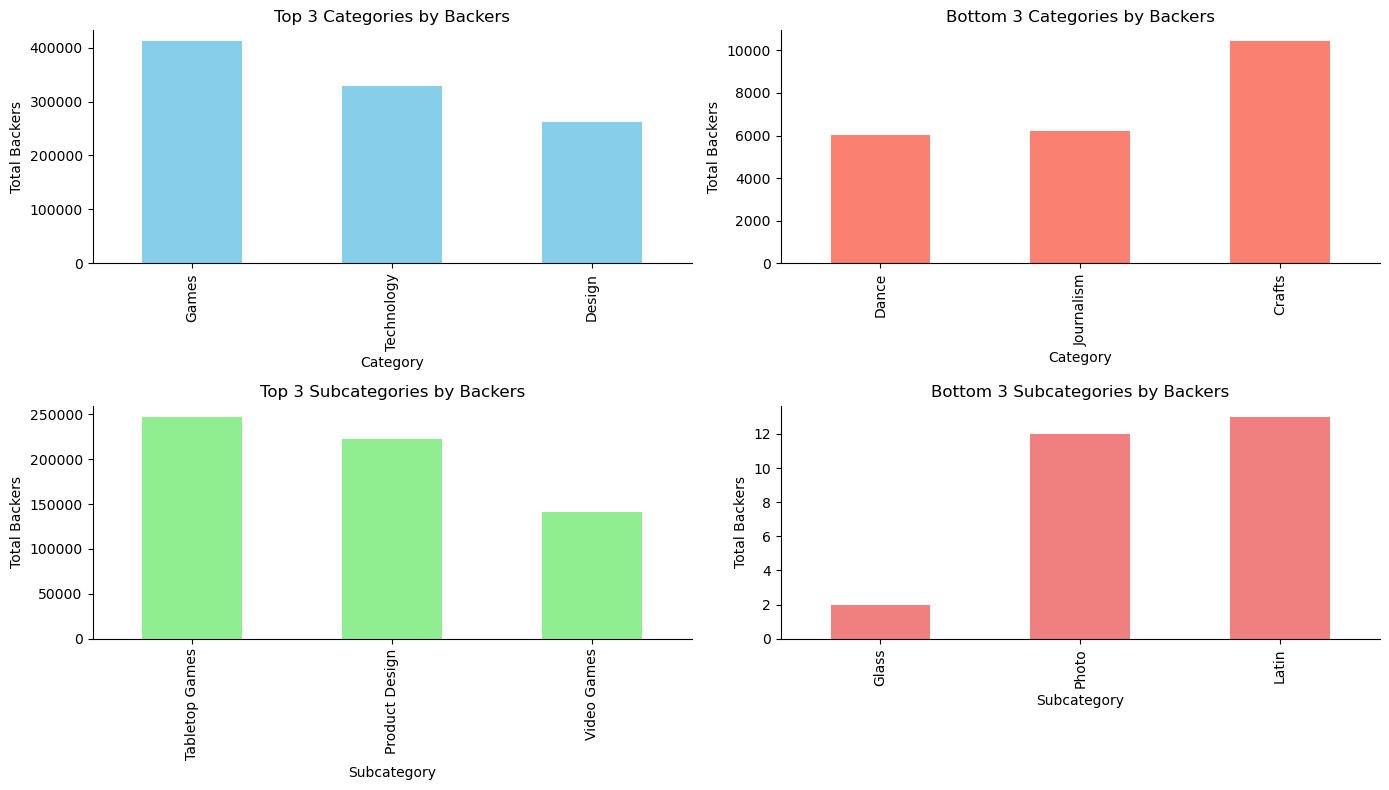

In [115]:
top_categories = df.groupby('Category')['backers'].sum().sort_values(ascending=False).head(3)

# Bottom 3 categories by backers
bottom_categories = df.groupby('Category')['backers'].sum().sort_values().head(3)

# Top 3 subcategories by backers
top_subcategories = df.groupby('Sub_Category')['backers'].sum().sort_values(ascending=False).head(3)

# Bottom 3 subcategories by backers
bottom_subcategories = df.groupby('Sub_Category')['backers'].sum().sort_values().head(3)

# Visualization
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 3 Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Total Backers')

plt.subplot(2, 2, 2)
bottom_categories.plot(kind='bar', color='salmon')
plt.title('Bottom 3 Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Total Backers')

plt.subplot(2, 2, 3)
top_subcategories.plot(kind='bar', color='lightgreen')
plt.title('Top 3 Subcategories by Backers')
plt.xlabel('Subcategory')
plt.ylabel('Total Backers')

plt.subplot(2, 2, 4)
bottom_subcategories.plot(kind='bar', color='lightcoral')
plt.title('Bottom 3 Subcategories by Backers')
plt.xlabel('Subcategory')
plt.ylabel('Total Backers')

plt.tight_layout()
sns.despine()
plt.show()

In [116]:
#What are the top/bottom 3 categories that have raised the most money? 
#What are the top/bottom 3 subcategories that have raised the most money?



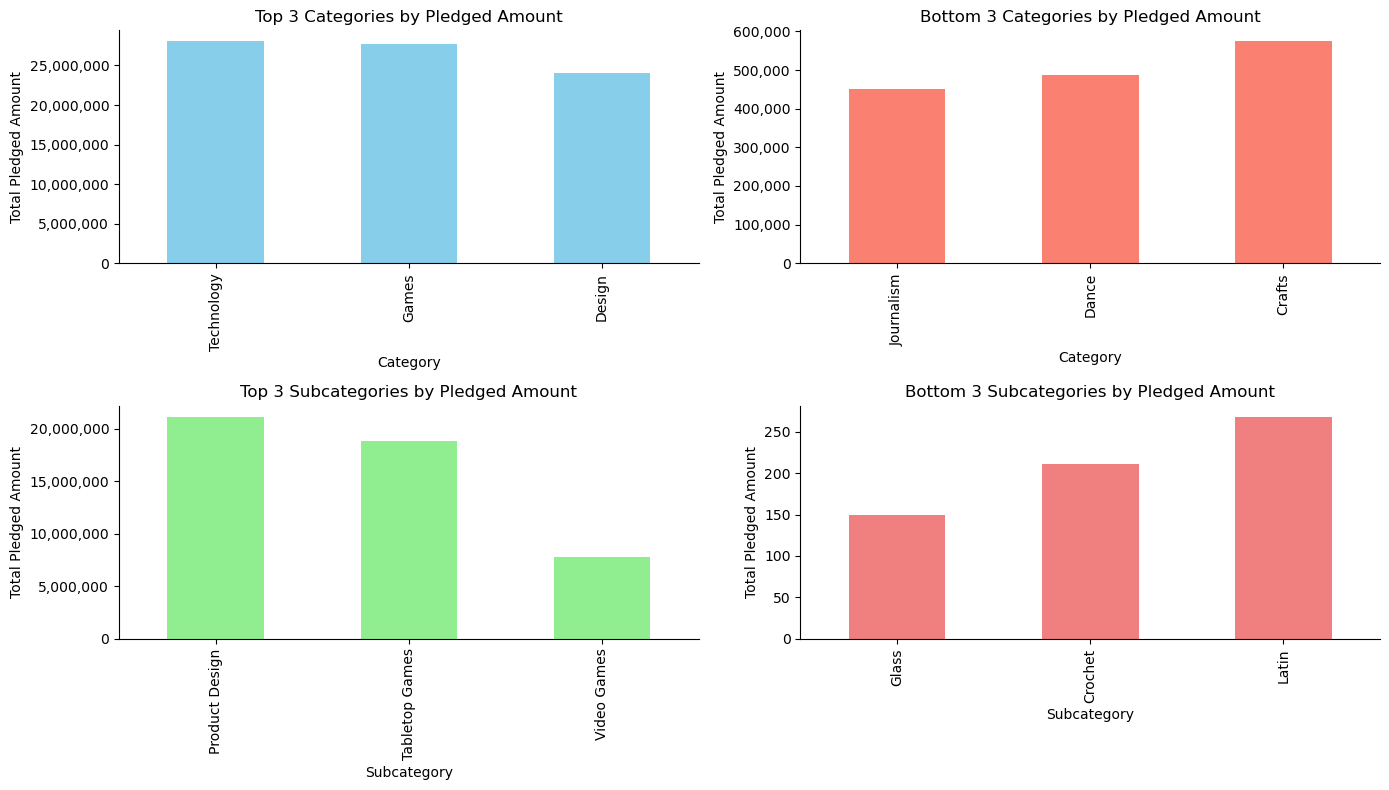

In [118]:
df['pledged'] = df['pledged'].round()
# Top 3 categories by pledged amount
top_categories_pledged = df.groupby('Category')['pledged'].sum().sort_values(ascending=False).head(3)

# Bottom 3 categories by pledged amount
bottom_categories_pledged = df.groupby('Category')['pledged'].sum().sort_values().head(3)

# Top 3 subcategories by pledged amount
top_subcategories_pledged = df.groupby('Sub_Category')['pledged'].sum().sort_values(ascending=False).head(3)

# Bottom 3 subcategories by pledged amount
bottom_subcategories_pledged = df.groupby('Sub_Category')['pledged'].sum().sort_values().head(3)


# Visualization
plt.figure(figsize=(14, 8))

def format_ticks(x, pos):
    return '{:,.0f}'.format(x)

formatter = ticker.FuncFormatter(format_ticks)

plt.subplot(2, 2, 1)
top_categories_pledged.plot(kind='bar', color='skyblue')
plt.title('Top 3 Categories by Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Total Pledged Amount')
plt.gca().yaxis.set_major_formatter(formatter) 

plt.subplot(2, 2, 2)
bottom_categories_pledged.plot(kind='bar', color='salmon')
plt.title('Bottom 3 Categories by Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Total Pledged Amount')
plt.gca().yaxis.set_major_formatter(formatter) 

plt.subplot(2, 2, 3)
top_subcategories_pledged.plot(kind='bar', color='lightgreen')
plt.title('Top 3 Subcategories by Pledged Amount')
plt.xlabel('Subcategory')
plt.ylabel('Total Pledged Amount')
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(2, 2, 4)
bottom_subcategories_pledged.plot(kind='bar', color='lightcoral')
plt.title('Bottom 3 Subcategories by Pledged Amount')
plt.xlabel('Subcategory')
plt.ylabel('Total Pledged Amount')
plt.gca().yaxis.set

plt.tight_layout()
sns.despine()
plt.show()

The most successful board game company in the 'table_games' subcategory raised $3999796.0 with 40642.0 backers.


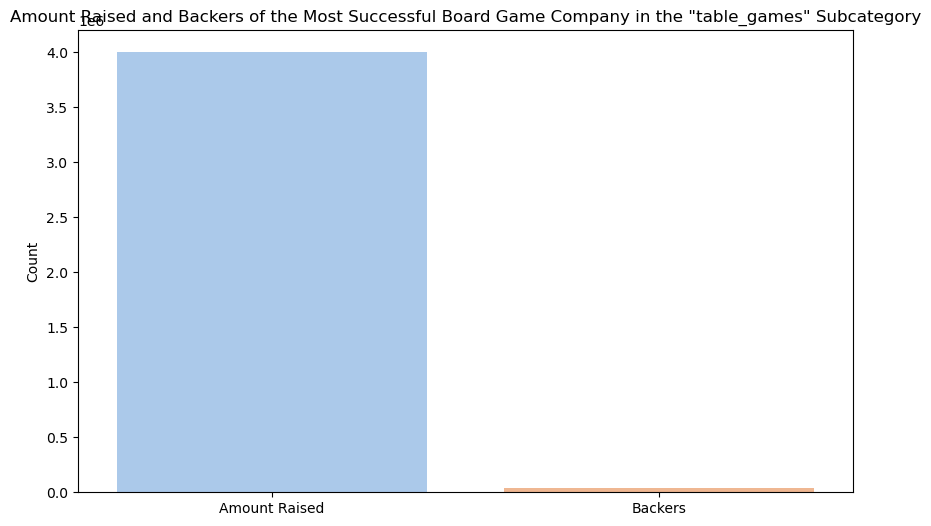

In [128]:
#3. What was the amount the most successful board game 
#company raised? How many backers did they have?

# Filter for successful campaigns in the "table_games" subcategory
successful_table_games = df[(df['outcome'] == 'successful') & (df['Sub_Category'] == 'Tabletop Games')]

# Find the campaign with the highest amount raised
most_successful_campaign = successful_table_games[successful_table_games['pledged'] == successful_table_games['pledged'].max()]

# Get the amount raised and the number of backers
amount_raised = most_successful_campaign['pledged'].values[0]
backers = most_successful_campaign['backers'].values[0]

# Print the amount raised and the number of backers
print("The most successful board game company in the 'table_games' subcategory raised ${} with {} backers.".format(amount_raised, backers))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=['Amount Raised', 'Backers'], y=[amount_raised, backers], palette='pastel')
plt.title('Amount Raised and Backers of the Most Successful Board Game Company in the "table_games" Subcategory')
plt.ylabel('Count')
plt.show()

In [139]:
df.head()

,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome
0,1,Ragdolls,US,USD,Film & Video,Webseries,2013-04-25,2013-05-25,15000.000,20.000,3.000,failed
1,2,One To Ten,GB,GBP,Film & Video,Shorts,2015-11-16,2015-12-16,223.680,414.000,23.000,successful
2,3,Future Gun - A short film about kids and advan...,US,USD,Film & Video,Animation,2013-08-28,2013-09-27,5000.000,1497.000,28.000,failed
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,US,USD,Fashion,Apparel,2014-07-22,2014-08-21,6000.000,8795.000,218.000,successful
4,5,The Rich Lifestyle,US,USD,Film & Video,Documentary,2016-08-24,2016-09-28,2000000.000,2.000,2.000,failed


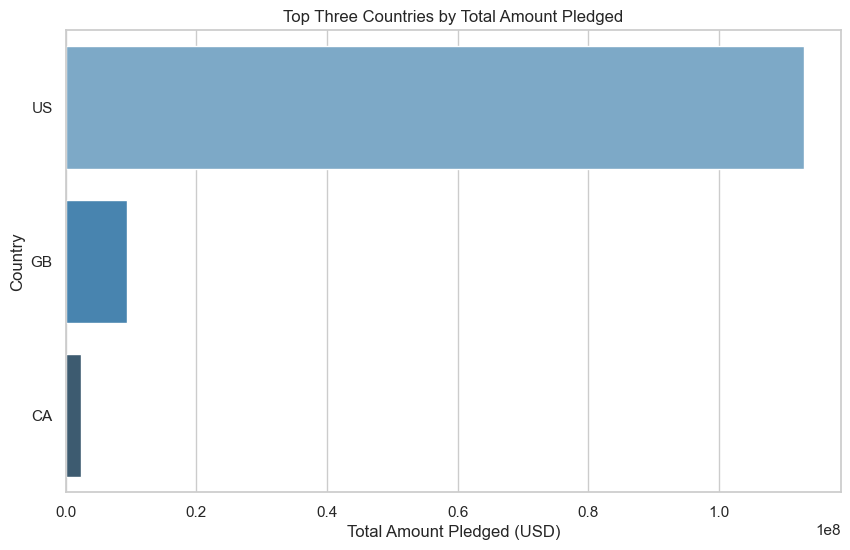

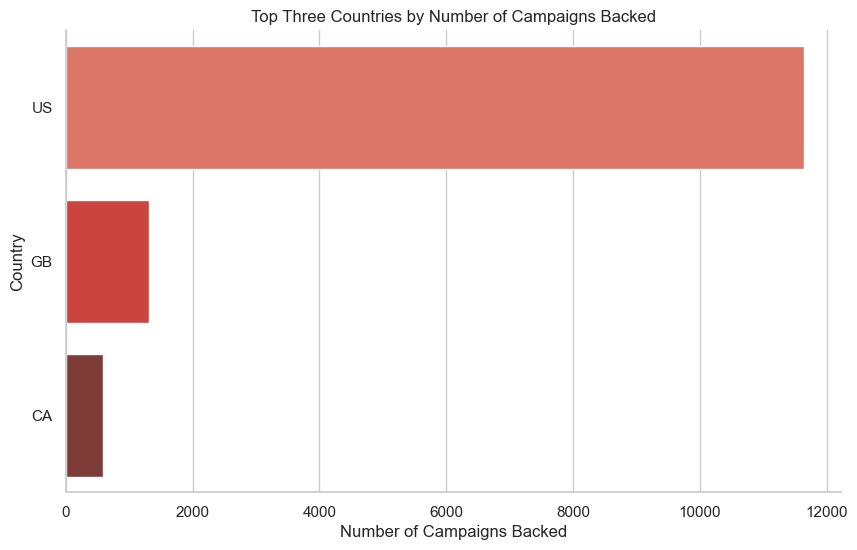

In [144]:
df['pledged'] = df['pledged'].round()
# Rank countries by total amount pledged
top_countries_pledged = df.groupby('Country').sum()['pledged'].sort_values(ascending=False).head(3)

# Rank countries by number of campaigns backed
top_countries_backed = df['Country'].value_counts().head(3)



# Plot total amount pledged by country
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_pledged.values, y=top_countries_pledged.index, palette='Blues_d')
plt.xlabel('Total Amount Pledged (USD)')
plt.ylabel('Country')
plt.title('Top Three Countries by Total Amount Pledged')
plt.show()

# Plot number of campaigns backed by country
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_backed.values, y=top_countries_backed.index, palette='Reds_d')
plt.xlabel('Number of Campaigns Backed')
plt.ylabel('Country')
plt.title('Top Three Countries by Number of Campaigns Backed')
sns.despine()
plt.show()

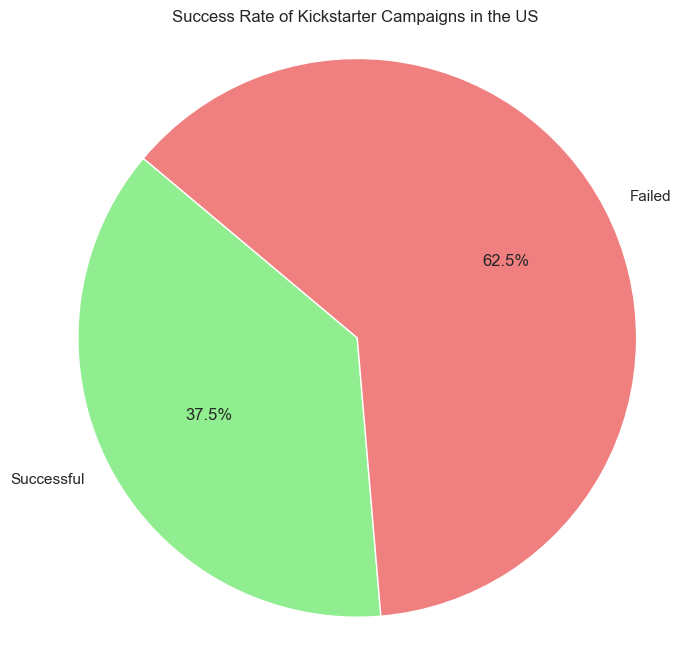

In [177]:
#Piechart to get success rate for kickstarter in USA 
# Filter the DataFrame to include only US campaigns
us_campaigns = df[df['Country'] == 'US']

# Calculate the number of successful campaigns
successful_campaigns = us_campaigns[us_campaigns['outcome'] == 'successful'].shape[0]

# Calculate the number of failed campaigns
failed_campaigns = us_campaigns[us_campaigns['outcome'] == 'failed'].shape[0]

# Calculate the total number of campaigns
total_campaigns = us_campaigns.shape[0]

# Calculate success rate
success_rate = successful_campaigns / total_campaigns

labels = ['Successful', 'Failed']
sizes = [success_rate, 1 - success_rate]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Success Rate of Kickstarter Campaigns in the US')
plt.axis('equal')  
plt.show()

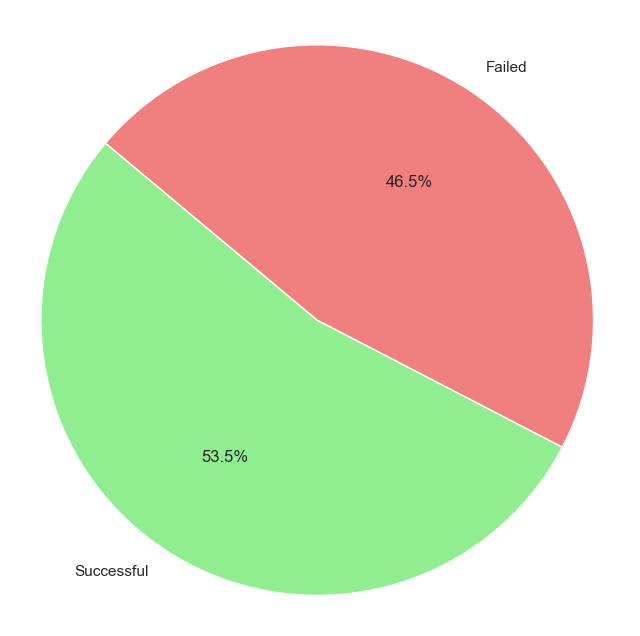

In [181]:
# Piechart to get success rate for Tabletop games subcategory
# Filter the DataFrame to include only US campaigns in the "Tabletop Games" subcategory
us_tabletop_games = df[(df['Country'] == 'US') & (df['Sub_Category'] == 'Tabletop Games')]

# Calculate the number of successful campaigns
successful_campaigns = us_tabletop_games[us_tabletop_games['outcome'] == 'successful'].shape[0]

# Calculate the number of failed campaigns
failed_campaigns = us_tabletop_games[us_tabletop_games['outcome'] == 'failed'].shape[0]

# Calculate the total number of campaigns
total_campaigns = us_tabletop_games.shape[0]

# Calculate success rate
success_rate = successful_campaigns / total_campaigns


labels = ['Successful', 'Failed']
sizes = [success_rate, 1 - success_rate]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
# plt.title('Success Rate of Kickstarter Campaigns in Tabletop Games (USA)')
plt.axis('equal')  
plt.show()

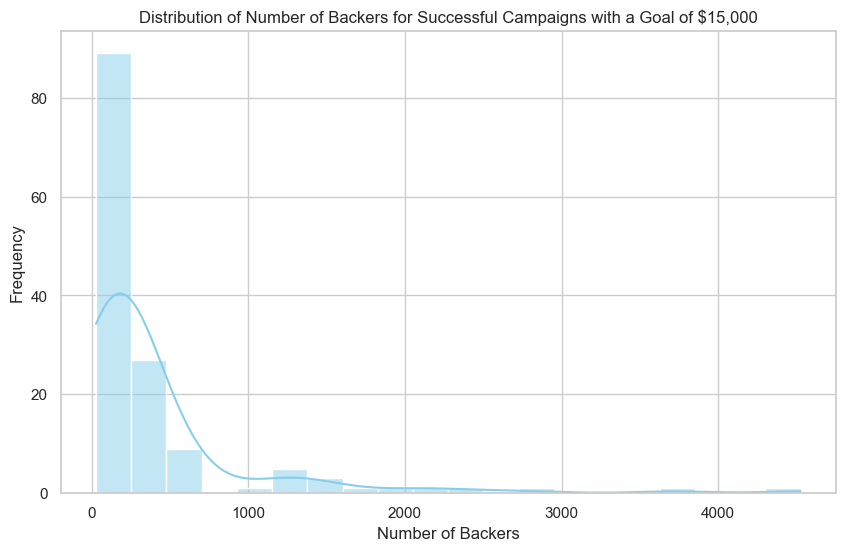

In [149]:
# Filter the DataFrame to include only campaigns with a goal of $15,000
goal_15000 = df[df['goal'] == 15000]

# Filter further to include only successful campaigns
successful_15000 = goal_15000[goal_15000['outcome'] == 'successful']

# Plot the distribution of the number of backers for successful campaigns with a goal of $15,000
plt.figure(figsize=(10, 6))
sns.histplot(successful_15000['backers'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Backers for Successful Campaigns with a Goal of $15,000')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')
plt.show()

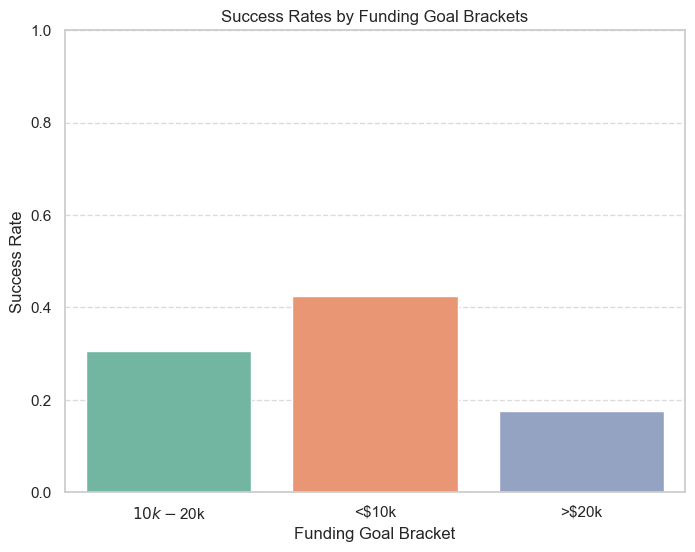

In [166]:
# Fixes the errors in the values
df['goal'] = pd.to_numeric(df['goal'], errors='coerce')

def categorize_goal(goal):
    if goal < 10000:
        return '<$10k'
    elif 10000 <= goal <= 20000:
        return '$10k-$20k'
    else:
        return '>$20k'

df['Goal_Bracket'] = df['goal'].apply(categorize_goal)

# Calculate success rate for each bracket
success_rates = df.groupby('Goal_Bracket')['outcome'].apply(lambda x: (x == 'successful').mean()).reset_index(name='Success Rate')

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=success_rates, x='Goal_Bracket', y='Success Rate', palette='Set2')
plt.title('Success Rates by Funding Goal Brackets')
plt.xlabel('Funding Goal Bracket')
plt.ylabel('Success Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [184]:
df.head()


,Campaign_ID,Campaign_Name,Country,Currency,Category,Sub_Category,launched,deadline,goal,pledged,backers,outcome,Unnamed: 12,Goal_Bracket
0,1,Ragdolls,US,USD,Film & Video,Webseries,2013-04-25 0:00:00,2013-05-25 0:00:00,15000.000,20.000,3.000,failed,NaN,$10k-$20k
1,2,One To Ten,GB,GBP,Film & Video,Shorts,2015-11-16 0:00:00,2015-12-16 0:00:00,223.680,413.810,23.000,successful,NaN,<$10k
2,3,Future Gun - A short film about kids and advan...,US,USD,Film & Video,Animation,2013-08-28 0:00:00,2013-09-27 0:00:00,5000.000,1497.000,28.000,failed,NaN,<$10k
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,US,USD,Fashion,Apparel,2014-07-22 0:00:00,2014-08-21 0:00:00,6000.000,8795.000,218.000,successful,NaN,<$10k
4,5,The Rich Lifestyle,US,USD,Film & Video,Documentary,2016-08-24 0:00:00,2016-09-28 0:00:00,2000000.000,2.000,2.000,failed,NaN,>$20k
